In [1]:
import numpy as np
import emcee
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
import pymc as pm
import numpy as np

# Samples for each dose level
n = 5 * np.ones(4, dtype=int)
# Log-dose
dose = np.array([-.86, -.3, -.05, .73])

with pm.Model() as model:
    # Logit-linear model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=0.01)
    beta = pm.Normal('beta', mu=0, sigma=0.01)

    # Calculate probabilities of death
    theta = pm.Deterministic('theta', pm.math.invlogit(alpha + beta * dose))

    # Data likelihood
    deaths = pm.Binomial(
        'deaths',
        n=n,
        p=theta,
        observed=np.array([0, 1, 3, 5], dtype=float)
    )

    # Calculate LD50
    LD50 = pm.Deterministic('LD50', -alpha / beta)

    # Sample from the posterior
    trace = pm.sample(1000, tune=2000, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Output()

Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'LD50'}>,
        <Axes: title={'center': 'LD50'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

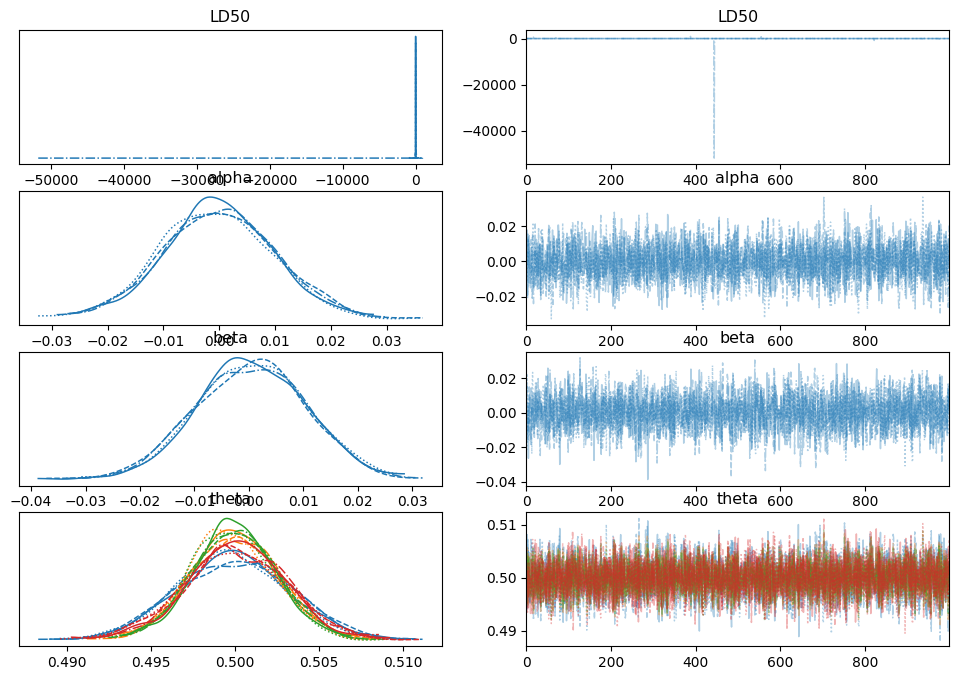

In [5]:
import arviz as az

az.plot_trace(trace)
